In [1]:
import numpy as np
import pandas as pd

# ui
import seaborn as sns
import matplotlib.pyplot as plt

# scikit
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [6]:
np.random.seed(1)
df = pd.read_csv('AirlineTweets.csv')
df = df[['airline_sentiment','text']]
df['label'] = df['airline_sentiment'].map({'positive' : 1, 'negative' : 0, 'neutral' : 2})
df.head()

,airline_sentiment,text,label
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


C:\Users\DELL\.conda\envs\projects\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='airline_sentiment', ylabel='count'>

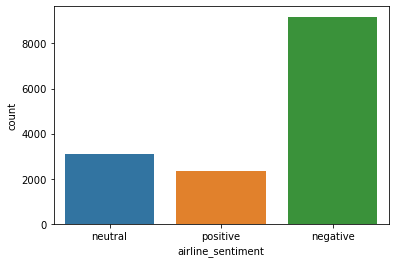

In [5]:
sns.countplot(df['airline_sentiment'])

<AxesSubplot: >

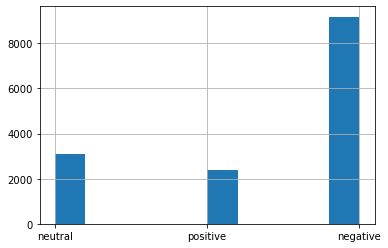

In [14]:
df['airline_sentiment'].hist()

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df['text'],df['label'])

In [11]:
df_train,df_test = train_test_split(df)

In [13]:
df_test

,airline_sentiment,text,label
10269,negative,@USAirways 2 hours on hold. Still no answer. H...,0
8572,positive,@JetBlue I'm all set. About to fly. Not bad fo...,1
10854,positive,"@USAirways awesome! And yes, @UpInAirClaire is!",1
6140,neutral,@SouthwestAir Working on a piece about militar...,2
7179,negative,@JetBlue someone should screen what you play o...,0
...,...,...,...
11850,negative,@USAirways I expect something more than tellin...,0
1934,neutral,@united with about 25 people trying to get on ...,2
13273,neutral,@AmericanAir fl 249 to DFW is leaving Newark o...,2
13933,negative,@AmericanAir 1 ticket agent servicing at least...,0


In [17]:
vectorizor = TfidfVectorizer(max_features=2000)
X_train = vectorizor.fit_transform(df_train['text'])
X_test  = vectorizor.transform(df_test['text'])

In [19]:
y_train = df_train['label']
y_test  = df_test['label']

In [20]:
model = LogisticRegression(max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [22]:
print('train accuracy ', model.score(X_train,y_train))
print('test  accuracy ', model.score(X_test,y_test))

train accuracy  0.853551912568306
test  accuracy  0.7931693989071038


In [29]:
prob_train = model.predict_proba(X_train)
prob_test  = model.predict_proba(X_test)
print('training auc ' , roc_auc_score(y_train,prob_train,multi_class='ovo'))
print('tes      auc ' , roc_auc_score(y_test,prob_test,multi_class='ovo'))

training auc  0.9429232561661497
tes      auc  0.8939836122324817


In [30]:
P_train = model.predict(X_train)
P_test  = model.predict(X_test)
cm = confusion_matrix(y_train,P_train,normalize='true')
cm

array([[0.96193371, 0.00752641, 0.03053988],
       [0.1895276 , 0.7108708 , 0.09960159],
       [0.31114952, 0.0505618 , 0.63828868]])

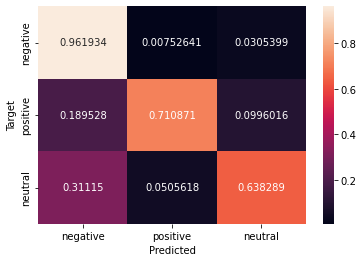

In [32]:
def plot_cm(cm):
    classes = ['negative','positive','neutral']
    df_cm = pd.DataFrame(cm,index=classes,columns=classes)
    ax = sns.heatmap(df_cm,annot=True,fmt='g')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Target')

plot_cm(cm)

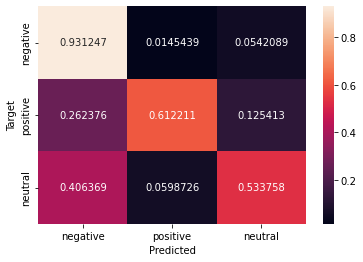

In [33]:
cm_test = confusion_matrix(y_test,P_test,normalize='true')
plot_cm(cm_test)

In [41]:
df_b_train = df_train[df_train['label'].isin([0,1])]
df_b_test  = df_test[df_test['label'].isin([0,1])]

In [54]:
featurizer = TfidfVectorizer(max_features=2000)
Xtrain = featurizer.fit_transform(df_b_train['text'])
Xtest  = featurizer.transform(df_b_test['text'])

In [55]:
Ytrain = df_b_train['label']
Ytest  = df_b_test['label']

In [56]:
model = LogisticRegression(max_iter=500)
model.fit(Xtrain,df_b_train['label'])
print('train acc ', model.score(Xtrain,Ytrain))
print('tes   acc ', model.score(Xtest,Ytest))

train acc  0.9306485114239557
tes   acc  0.9102608695652173


In [57]:
prob_train = model.predict_proba(Xtrain)[:,1]
prob_test  = model.predict_proba(Xtest)[:,1]
print('training auc ' , roc_auc_score(Ytrain,prob_train))
print('tes      auc ' , roc_auc_score(Ytest,prob_test))

training auc  0.978935198972116
tes      auc  0.9546019167804838


In [62]:
model.coef_

array([[-0.23394143,  0.48436886, -0.54732434, ..., -0.20909221,
        -0.31597515, -0.35133087]])

(array([  2.,   0.,   1.,   4.,   2.,   8.,  17.,  51., 132., 564., 713.,
        313., 106.,  54.,  15.,   2.,   0.,   7.,   1.,   3.,   1.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-4.32861358, -3.91759354, -3.5065735 , -3.09555346, -2.68453342,
        -2.27351338, -1.86249334, -1.4514733 , -1.04045325, -0.62943321,
        -0.21841317,  0.19260687,  0.60362691,  1.01464695,  1.42566699,
         1.83668704,  2.24770708,  2.65872712,  3.06974716,  3.4807672 ,
         3.89178724,  4.30280728,  4.71382732,  5.12484737,  5.53586741,
         5.94688745,  6.35790749,  6.76892753,  7.17994757,  7.59096761,
         8.00198766]),
 <BarContainer object of 30 artists>)

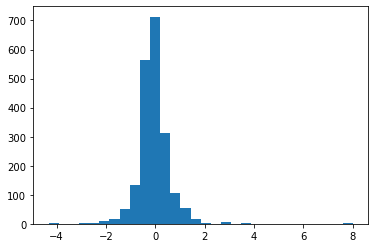

In [65]:
plt.hist(model.coef_[0],bins=30)

In [66]:
word_index_map = vectorizor.vocabulary_
word_index_map

{'you': 1995,
 'll': 1060,
 'enjoy': 605,
 'this': 1760,
 'jetblue': 978,
 'our': 1280,
 'fleet': 713,
 'on': 1256,
 'fleek': 712,
 'http': 905,
 'co': 379,
 'southwestair': 1646,
 'and': 133,
 'thx': 1771,
 'for': 745,
 'not': 1223,
 'responding': 1488,
 'virginamerica': 1889,
 'is': 963,
 'such': 1692,
 'great': 815,
 'deal': 486,
 'already': 118,
 'thinking': 1758,
 'about': 63,
 'my': 1192,
 '2nd': 30,
 'trip': 1815,
 'to': 1784,
 'australia': 195,
 'amp': 131,
 'haven': 849,
 'even': 620,
 'gone': 809,
 '1st': 16,
 'yet': 1993,
 'united': 1851,
 'lax': 1021,
 'jfk': 980,
 'americanair': 127,
 'ty': 1836,
 'but': 291,
 'their': 1749,
 'site': 1607,
 'says': 1539,
 'please': 1356,
 'note': 1225,
 'that': 1746,
 'we': 1918,
 'do': 548,
 'offer': 1242,
 'print': 1386,
 'service': 1570,
 'american': 126,
 'way': 1916,
 'usairways': 1871,
 'check': 352,
 'in': 932,
 'at': 184,
 'st': 1659,
 'so': 1626,
 'rude': 1516,
 'the': 1748,
 'tsa': 1824,
 'than': 1742,
 'them': 1750,
 'spend': 16

In [69]:
threshold = 1

print('most positive words:')
for word,index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word, weight)

most positive words:
jfk 1.2562237152279994
says 1.3361285457891137
that 1.7146923888070265
being 1.0321855120359018
off 1.0056182796825899
refund 1.0798349969212542
dfw 1.6792365209743396
just 1.3330414713483583
baggage 4.305529129209381
why 1.0484274957792203
did 1.0936018981624258
answer 1.2559035669703367
very 3.683613642926469
got 1.0351853195504288
expect 1.3206060912287723
lost 4.204473272705083
customer 1.0659061175748876
answering 3.7085352226273365
lot 1.465604946205424
found 1.0711968497756588
near 1.1625729370160522
deliver 1.263427841527288
following 1.2877211730964533
needed 1.7446381470399912
asking 1.8133994602244563
suggest 1.2598918954218319
gonna 2.9519068609297556
known 2.8969260689021263
wall 1.286122675494084
feel 1.4640579884953995
follow 1.0455510427239496
switch 1.2859605836182346
week 1.1174367488020809
working 1.3432911047177145
things 2.683296967039397
incompetent 1.0682222491999653
add 1.2480160132410938
wifi 1.269779870845329
asked 2.8951333901143963
jump 

In [68]:
print('most negative words:')
for word,index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < threshold:
        print(word, weight)

most negative words:
you 0.024954863216388835
ll -0.10053120424195186
enjoy -0.5559859233502573
this 0.3002725791744319
jetblue 0.1560589329515539
our -0.3410307785514926
fleet -0.6168254743946959
on 0.022332403957151633
fleek 0.134929038736972
http -1.4668855752976482
co -0.2807418659657597
southwestair -0.21636947106759694
and -0.49385837946769073
thx 0.4765526013391763
for 0.0885782888175533
not -0.1873613817730675
responding -0.0671702548959269
virginamerica -0.48047770656836797
is -0.35718732071929676
such -0.18530216504609553
great 0.9075164131656362
deal 0.4704750232086249
already 0.741862458921508
thinking 0.03255272855324394
about 0.02458192867456459
my -0.2418650609047291
2nd -0.20451026114079796
trip -0.43270702718641413
to 0.22833399078181624
australia 0.07259864366488694
amp -0.34245160975114486
haven -0.3670135429829382
even 0.35647653836989235
gone -0.1817491288256616
1st -0.218468506763799
yet -0.32694624080679513
united -0.0803714204131935
lax -0.48771630148726564
jfk 

hands -0.1500675857567292
experienced -0.20685140619978476
makes -0.36256873705289583
amazing 0.24707164459984304
unitedairlines -1.193220365418701
become 0.19019245179544675
passenger -0.07233310773044146
save 0.6530111805812113
rows -0.30141128206070145
position 0.09869003232993476
requested 0.01904304293745006
ewr 0.025412022923380892
end -0.3305442358833494
may -0.08893830416325738
live -0.1989714078901302
cant -0.22206159718374108
promotion -0.0670106026058855
error -0.10132858499225743
appreciate 0.30878599673359003
however -1.7521922124539508
woman -0.1381640411721146
working 1.3432911047177145
counter 0.0418883051875772
ur -0.3086711107459815
fi 0.09159842474975646
works 0.09775268301140375
100 -0.5280333727706572
london 0.5751986887005561
concerned -0.4653153138643691
aware -0.6523005495519336
hence 0.6453295297817605
msg -0.8916888524500285
ah -0.267120260921595
direct -1.0907884840130029
cheaper -0.16348992266953527
costs -0.1353473736498257
switched 0.16887318948097949
few 

mdw -0.09333482875924135
private 0.05408494154117339
details -0.060535213739165455
song -0.6220686915346879
message -0.015585679621385667
lesson -0.4460862090198625
mileage -0.4184295202671589
a320 0.0052400130170662884
livery -0.14413618806774214
gives 0.0874468326336814
platinum -0.1850625721548124
laptop -0.11774271983679613
god 0.26995129858120115
middle 0.6209365377203362
fare 0.2173073761779301
sharing -0.1778976239188605
mia -0.8906560502431737
errors -0.4776160146117412
ladygaga 0.651976231581671
carrieunderwood -0.38190035893938296
buffalo -0.5309469436934746
mobile -0.21092588320879263
disgusting -0.3722997867060902
previous -0.2402561508182822
23 -0.6069782310909804
sell -0.17943817143885663
correct -0.2698531526631388
mistake -1.370515489155574
paying 0.46155748720658185
fyi -0.13749484581746102
manage -0.2019542973771102
sold 0.4995736560420647
goes -0.9998737351775551
equipment -0.269394905243861
failure 0.05083930017734929
spiritairlines -0.5748062462851105
friendly 1.01